## Zero Shot Learning


Zero-Shot Learning (ZSL) is a Machine Learning paradigm where a pre-trained deep learning model is made to generalize on a novel category of samples, i.e., the training and testing set classes are disjoint.


## Installing Libraries

In [1]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json
import re 
from random import shuffle
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

## Reading Dataset

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id': '1F4THlws1a020-XRZ21UXP_7Mqo92CisY'}) 
downloaded.GetContentFile('video_dataset.csv')  
video_dataset = pd.read_csv(open('video_dataset.csv'))

In [5]:
video_dataset.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Correlation Between Dataset Columns

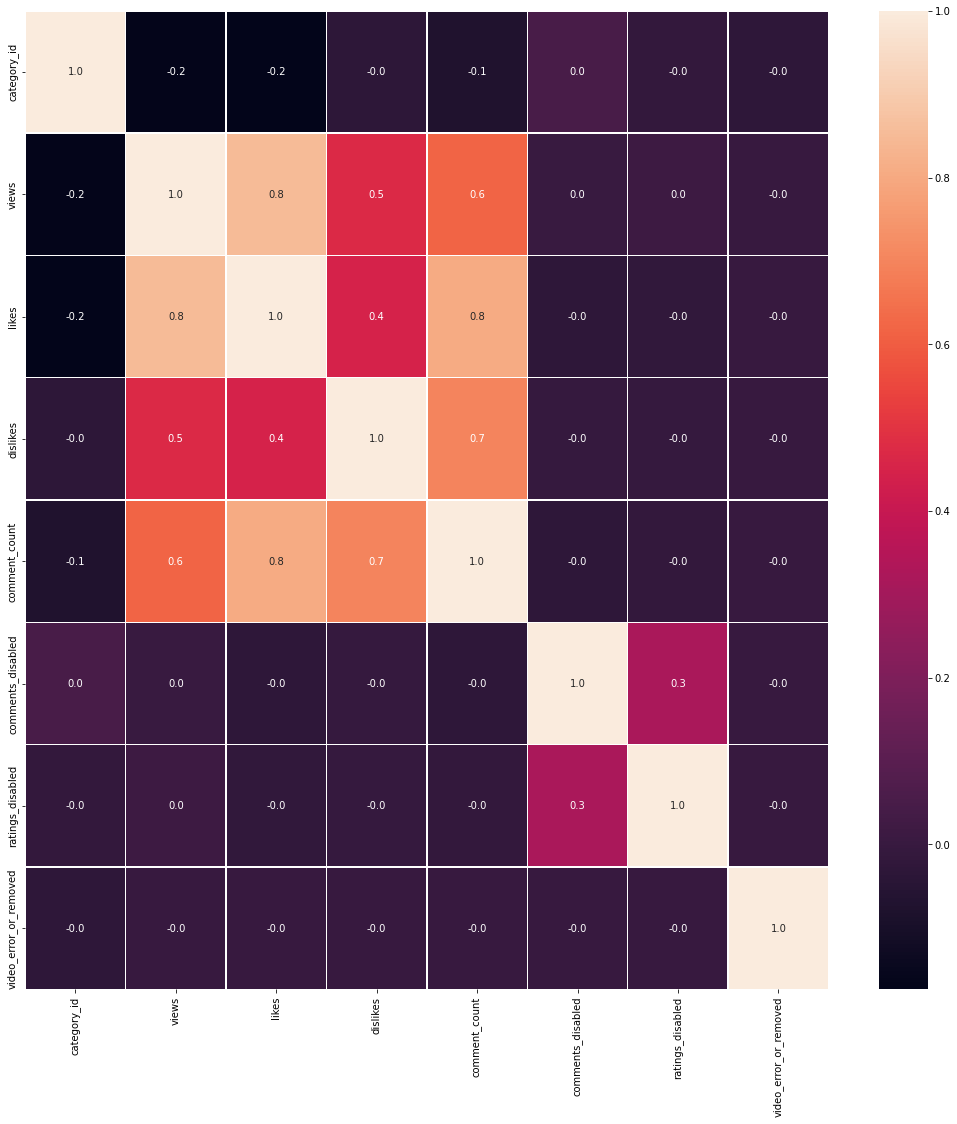

In [6]:
f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(video_dataset.corr(), 
            annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Data Refactoring

In [7]:
all_categories = {
  "1":"Film & Animation",
  "2":"Autos & Vehicles",
  "10":"Music",
  "15":"Pets & Animals",
  "17":"Sports",
  "18":"Short Movies",
  "19":"Travel & Events",
  "20":"Gaming",
  "21":"Videoblogging",
  "22":"People & Blogs",
  "23":"Comedy",
  "24":"Entertainment",
  "25":"News & Politics",
  "26":"How to & Style",
  "27":"Education",
  "28":"Science & Technology",
  "29":"Nonprofits & Activism",
  "30":"Movies",
  "31":"Anime/Animation",
  "32":"Action/Adventure",
  "33":"Classics",
  "34":"Comedy",
  "35":"Documentary",
  "36":"Drama",
  "37":"Family",
  "38":"Foreign",
  "39":"Horror",
  "40":"Sci-Fi/Fantasy",
  "41":"Thriller",
  "42":"Shorts",
  "43":"Shows",
  "44":"Trailers"
  }

In [8]:
video_dataset["cateogory_name"] = ""
 
for index, row in tqdm(video_dataset.iterrows(), total=video_dataset.shape[0]):
    cat_id = row['category_id']
    cat_name = all_categories[str(cat_id)]
    video_dataset.at[index,'cateogory_name'] = cat_name

100%|██████████| 40949/40949 [00:02<00:00, 17909.30it/s]


In [9]:
relevant_columns = ["video_id", "title", "description", "cateogory_name"]
video_dataset = video_dataset[relevant_columns]

In [10]:
video_dataset.head()

,video_id,title,description,cateogory_name
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,I Dare You: GOING BALD!?,I know it's been a while since we did this sho...,Entertainment


## Data Distribution

Text(0.5, 0, 'Video Categories')

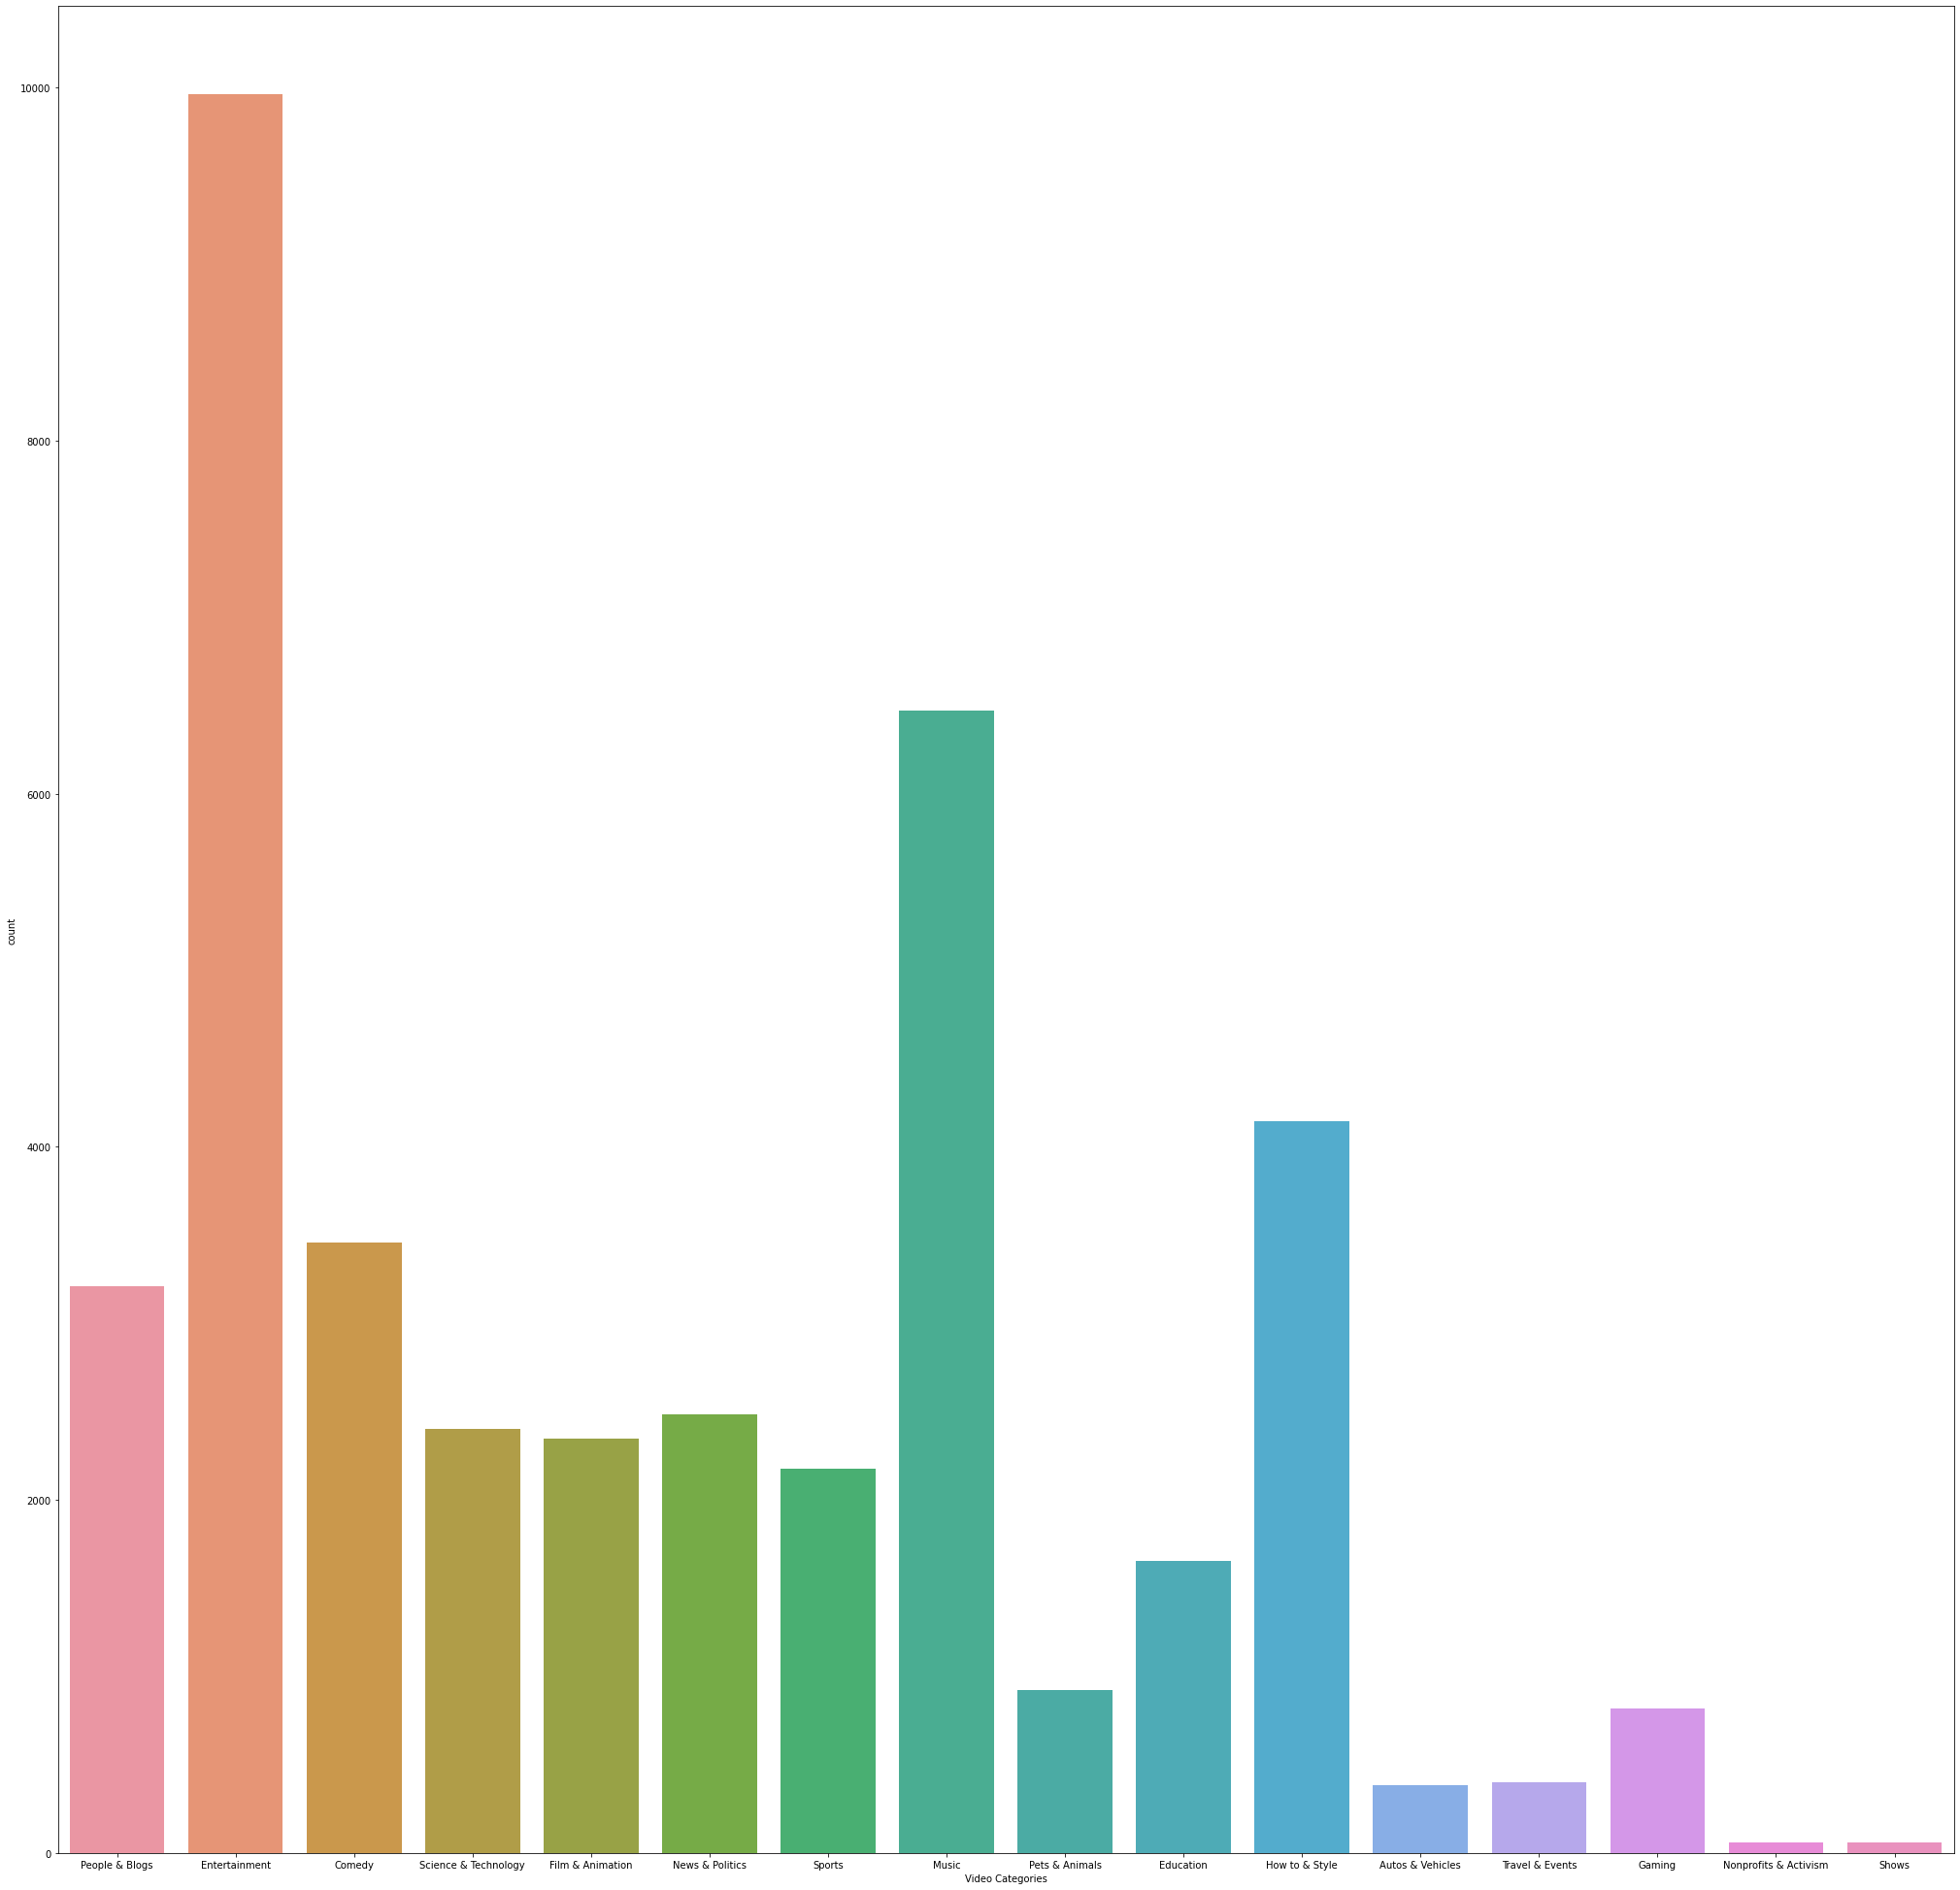

In [11]:
f,ax = plt.subplots(figsize=(35, 35))

sns.countplot(video_dataset.cateogory_name)
plt.xlabel('Video Categories')

## Video Classification using Zero-Shot

In [12]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

all_categories = [
    "Film & Animation", "Autos & Vehicles", "Music", "Pets & Animals",
    "Sports", "Short Movies", "Travel & Events", "Gaming", "Videoblogging",
    "People & Blogs", "Comedy", "Entertainment", "News & Politics",
    "How to & Style", "Education", "Science & Technology", "Nonprofits & Activism",
    "Movies", "Anime/Animation", "Action/Adventure", "Classics", "Comedy",
    "Documentary", "Drama", "Family", "Foreign", "Horror", "Sci-Fi/Fantasy",
    "Thriller", "Shorts", "Shows", "Trailers"
]

In [13]:
actuals = list(video_dataset["cateogory_name"])
predictions = []

In [14]:
for index, row in tqdm(video_dataset.head(500).iterrows(), 
                       total=video_dataset.head(500).shape[0]):
  
  video_title = row['title']
  zero_short_response = classifier(video_title, 
                                   all_categories, 
                                   multi_label=True)
  predictions.append(zero_short_response['labels'][0])

100%|██████████| 500/500 [1:48:13<00:00, 12.99s/it]


## Calculating Accuracy for Top 500 Videos

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(actuals[:500], predictions))

                      precision    recall  f1-score   support

    Action/Adventure       0.00      0.00      0.00         0
     Anime/Animation       0.00      0.00      0.00         0
    Autos & Vehicles       0.33      0.38      0.35         8
            Classics       0.00      0.00      0.00         0
              Comedy       0.50      0.10      0.17        40
         Documentary       0.00      0.00      0.00         0
               Drama       0.00      0.00      0.00         0
           Education       0.00      0.00      0.00        25
       Entertainment       0.41      0.21      0.28       119
              Family       0.00      0.00      0.00         0
    Film & Animation       0.00      0.00      0.00        24
             Foreign       0.00      0.00      0.00         0
              Gaming       0.00      0.00      0.00         3
              Horror       0.00      0.00      0.00         0
      How to & Style       0.00      0.00      0.00        41
       